In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_number
%matplotlib inline
from datetime import datetime, timedelta

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#warnings.filterwarnings("ignore")

In [3]:
data_root_path = "./data"
seattle_dir_name = "airbnb-seattle"
boston_dir_name = "airbnb-boston"

In [4]:
seattle_data_path = os.path.join(data_root_path, seattle_dir_name)
boston_data_path = os.path.join(data_root_path, boston_dir_name)

In [12]:
# def dataWrangle1 (df):
#     retframe = df.copy()
#     retframe["id"] = pd.to_numeric(retframe['id'], errors='coerce')
#     retframe = retframe.dropna(subset=['id'])
#     retframe["id"] = retframe["id"].astype("int64")
#     retframe.drop_duplicates(subset=['id'], inplace=True)
#     retframe['last_scraped'] = pd.to_datetime(retframe['last_scraped'], errors='coerce')
#     retframe = retframe.dropna(subset=['last_scraped'])
#     return retframe

### New Start

In [17]:
def dataWrangle1 (df):
    retframe = df.copy()
    retframe["id"] = pd.to_numeric(retframe['id'], errors='coerce')
    retframe = retframe.dropna(subset=['id'])
    retframe["id"] = retframe["id"].astype("int64")
    retframe.drop_duplicates(subset=['id'], inplace=True)
    retframe['last_scraped'] = pd.to_datetime(retframe['last_scraped'], errors='coerce')
    retframe = retframe.dropna(subset=['last_scraped'])
    return retframe

In [8]:
df_listing_boston = pd.read_csv(os.path.join(boston_data_path, "total_listings.csv"))
df_listing_seattle = pd.read_csv(os.path.join(seattle_data_path, "total_listings.csv"))

/tmp/ipykernel_74125/1310795763.py:1: DtypeWarning: Columns (0,2,22,41,45,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listing_boston = pd.read_csv(os.path.join(boston_data_path, "total_listings.csv"))
/tmp/ipykernel_74125/1310795763.py:2: DtypeWarning: Columns (2,22,41,45,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listing_seattle = pd.read_csv(os.path.join(seattle_data_path, "total_listings.csv"))


In [9]:
df_listing_seattle["location"] = "seattle"
df_listing_boston["location"] = "boston"
df_listing_total = pd.concat([df_listing_seattle, df_listing_boston]).reset_index(drop=True)

In [20]:
df_listing_total = dataWrangle1(df_listing_total)

In [21]:
df_listing_total[df_listing_total["location"] == "seattle"].shape

(8309, 76)

In [22]:
df_listing_total[df_listing_total["location"] == "boston"].shape

(6791, 76)

In [23]:
df_listing_total['last_scraped'].value_counts().sort_index()

last_scraped
2022-09-15    5184
2022-09-18    5903
2022-09-22       1
2022-10-02       1
2022-12-21     599
2022-12-24    1012
2023-03-19     478
2023-03-20      57
2023-03-25     598
2023-06-21      18
2023-06-22     454
2023-06-24     416
2023-06-25     379
Name: count, dtype: int64

In [24]:
categories = ["before 2022-09", "2022-09 ~ 2022-12", "2022-12 ~ 2023-03", "2023-03 ~ 2023-06"]
time_stamps = ["2022-09-30", "2022-12-30", "2023-03-30", "2023-06-30"]

In [25]:
print(['location = "seattle" and last_scraped < {}'.format(ts) for ts in time_stamps])

['location = "seattle" and last_scraped < 2022-09-30', 'location = "seattle" and last_scraped < 2022-12-30', 'location = "seattle" and last_scraped < 2023-03-30', 'location = "seattle" and last_scraped < 2023-06-30']


In [26]:
listing_cnt = [[df_listing_total.query('location == "seattle" and last_scraped < "{}"'.format(ts)).count()[0] for ts in time_stamps],
               [df_listing_total.query('location == "boston" and last_scraped < "{}"'.format(ts)).count()[0] for ts in time_stamps]]

/tmp/ipykernel_74125/2725797307.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  listing_cnt = [[df_listing_total.query('location == "seattle" and last_scraped < "{}"'.format(ts)).count()[0] for ts in time_stamps],
/tmp/ipykernel_74125/2725797307.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  listing_cnt = [[df_listing_total.query('location == "seattle" and last_scraped < "{}"'.format(ts)).count()[0] for ts in time_stamps],
/tmp/ipykernel_74125/2725797307.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consis

In [27]:
listing_cnt

[[5904, 6916, 7514, 8309], [5184, 5784, 6319, 6791]]

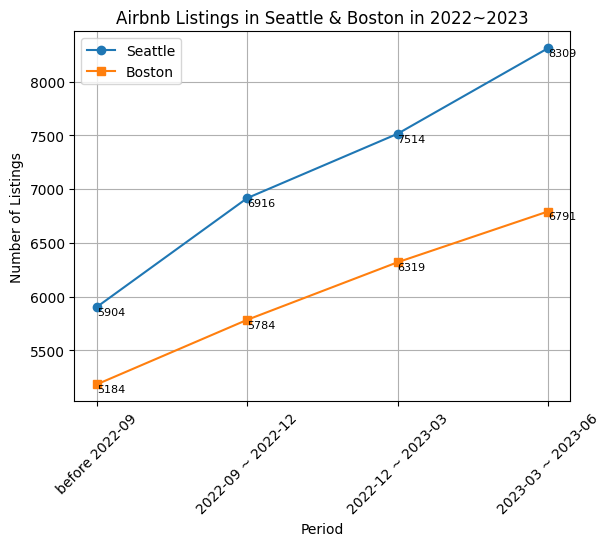

In [28]:
plt.plot(categories, listing_cnt[0], marker='o', label="Seattle")
plt.plot(categories, listing_cnt[1], marker='s', label="Boston")

ax = plt.gca()
for i, j in zip(categories, listing_cnt[0]):
    ax.text(i, j, f'{j}', ha='left', va='top', fontsize=8)

for i, j in zip(categories, listing_cnt[1]):
    ax.text(i, j, f'{j}', ha='left', va='top', fontsize=8)

plt.title("Airbnb Listings in Seattle & Boston in 2022~2023")
plt.ylabel("Number of Listings")
plt.xlabel("Period")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend();

In [56]:
df_listing_total.describe()

,id,last_scraped,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.510000e+04,15100,1.510000e+04,15098.000000,15098.000000,15098.000000,15098.000000,0.0,13280.000000,14885.00000,15098.000000,15093.000000,15093.000000,15093.000000,1.509300e+04,0.0,15098.000000,15098.000000,15098.000000,15098.000000,15098.000000,15098.000000,10791.000000,10775.000000,10776.000000,10774.000000,10776.000000,10774.000000,10774.000000,15098.000000,15098.000000,15098.000000,15098.000000,10791.000000
mean,2.859021e+17,2022-11-03 11:16:48,1.475713e+08,458.421049,45.249537,-99.285942,3.650748,NaN,1.775602,2.00262,568.504173,22.106539,65.626582,63.169867,1.745849e+06,NaN,10.354749,26.693933,46.211021,42.894688,12.238243,1.358723,4.738901,4.795998,4.762365,4.852765,4.839654,4.808617,4.668356,50.242350,39.517420,10.690621,0.012982,2.148570
min,3.168000e+03,2022-09-15 00:00:00,2.536000e+03,1.000000,42.231170,-122.420700,0.000000,NaN,1.000000,1.00000,1.000000,0.000000,1.000000,0.200000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.781828e+07,2022-09-15 00:00:00,2.165109e+07,2.000000,42.350931,-122.336504,2.000000,NaN,1.000000,1.00000,90.000000,1.000000,2.000000,2.000000,3.650000e+02,NaN,0.000000,4.000000,16.000000,0.000000,0.000000,0.000000,4.670000,4.760000,4.700000,4.860000,4.840000,4.760000,4.570000,1.000000,1.000000,0.000000,0.000000,0.540000
50%,5.073426e+07,2022-09-18 00:00:00,9.824366e+07,7.000000,47.542370,-122.287922,3.000000,NaN,1.000000,2.00000,365.000000,3.000000,5.000000,4.000000,1.125000e+03,NaN,7.000000,26.000000,51.000000,6.000000,2.000000,0.000000,4.870000,4.920000,4.900000,4.960000,4.960000,4.910000,4.780000,4.000000,2.000000,0.000000,0.000000,1.540000
75%,6.767658e+17,2022-12-21 00:00:00,2.635022e+08,86.000000,47.626902,-71.086442,4.000000,NaN,2.000000,3.00000,1125.000000,30.000000,30.000000,30.000000,1.125000e+03,NaN,18.000000,46.000000,74.000000,45.000000,15.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.920000,31.000000,15.000000,2.000000,0.000000,3.130000
max,9.198184e+17,2023-06-25 00:00:00,5.211079e+08,5646.000000,47.748000,-70.913250,16.000000,NaN,16.000000,22.00000,30000.000000,730.000000,998.000000,740.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,1185.000000,406.000000,27.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,477.000000,477.000000,274.000000,7.000000,18.110000
std,3.594116e+17,NaN,1.524749e+08,1227.297490,2.626675,25.493816,2.449184,NaN,1.124835,1.44106,540.351573,49.728985,170.036977,164.687217,5.797421e+07,NaN,10.410880,21.150368,31.235748,85.138245,21.218873,2.234025,0.435138,0.377148,0.399478,0.343237,0.371891,0.321109,0.425350,112.255439,107.039935,42.741380,0.198266,2.077441


In [47]:
def dataWrangle2 (df):
    retframe = df.copy()
    
    retframe["bathrooms"] = pd.to_numeric(retframe['bathrooms'], errors='coerce')
    retframe["bedrooms"] = pd.to_numeric(retframe['bedrooms'], errors='coerce')
    retframe["beds"] = pd.to_numeric(retframe['beds'], errors='coerce')
    retframe["price"] = pd.to_numeric(retframe['price'], errors='coerce')
    retframe["accommodates"] = pd.to_numeric(retframe['accommodates'], errors='coerce')
    retframe = retframe.dropna(subset=['bathrooms','bedrooms','beds','price','accommodates'])    
    
    retframe["bathrooms"] = retframe["bathrooms"].astype(int)
    retframe["bedrooms"] = retframe["bedrooms"].astype(int)
    retframe["beds"] = retframe["beds"].astype(int)
    retframe["price"] = retframe["price"].astype(float)
    retframe["accommodates"] = retframe["accommodates"].astype(float)
    
    retframe = retframe.query('bathrooms > 0 \
                        and bedrooms > 0 \
                        and beds > 0 \
                        and price > 0 \
                        and accommodates > 0')
    
    return retframe

In [5]:
df_calendar_boston = pd.read_csv(os.path.join(boston_data_path, "total_calendars.csv"))
df_calendar_seattle = pd.read_csv(os.path.join(seattle_data_path, "total_calendars.csv"))

df_calendar_seattle["location"] = "seattle"
df_calendar_boston["location"] = "boston"
#df_calendar_total = pd.concat([df_calendar_seattle, df_calendar_boston]).reset_index(drop=True)

In [56]:
df_calendar_total.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,location
0,53939356,2022-09-18,f,$38.00,$38.00,1.0,1125.0,seattle
1,53939356,2022-09-19,t,$37.00,$37.00,1.0,1125.0,seattle
2,53939356,2022-09-20,t,$37.00,$37.00,1.0,1125.0,seattle
3,53939356,2022-09-21,t,$39.00,$39.00,1.0,1125.0,seattle
4,53939356,2022-09-22,t,$39.00,$39.00,1.0,1125.0,seattle


In [37]:
def dataWrangle3 (df):
    ret = df.copy()
    ret['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)
    return ret

In [38]:
df_calendar_seattle = dataWrangle3(df_calendar_seattle)
df_calendar_boston = dataWrangle3(df_calendar_boston)

In [39]:
df_calendar_seattle.dtypes

listing_id          int64
date               object
available          object
price             float64
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
location           object
dtype: object

In [6]:
group = df_calendar_seattle.groupby(["listing_id", "date"])

In [10]:
# Calculate the count of records in each group
group_counts = group.size()
# Sort the groups based on count in descending order
sorted_groups = group_counts.sort_values(ascending=False)
# Take the first 5 groups with the maximum count
top_groups = sorted_groups.head(5)

print(top_groups)

listing_id  date      
50658154    2023-08-06    4
52905974    2023-07-07    4
            2023-06-25    4
            2023-06-26    4
            2023-06-27    4
dtype: int64


In [14]:
#df_calendar_seattle.query('listing_id == 50658154 and date == "2023-08-06"')
df_calendar_seattle.query('date == "2024-06-28"')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,location
7430511,33225888,2024-06-28,f,$350.00,$350.00,3.0,1125.0,seattle
8018162,52719504,2024-06-28,f,$120.00,$120.00,3.0,90.0,seattle


In [24]:
#list(df_calendar_seattle["date"].value_counts().sort_index())
df_calendar_boston["date"].value_counts().sort_index()

date
2022-09-15    5182
2022-09-16    5182
2022-09-17    5182
2022-09-18    5182
2022-09-19    5182
              ... 
2024-06-16    3973
2024-06-17    3973
2024-06-18    3973
2024-06-19    3973
2024-06-20    3856
Name: count, Length: 645, dtype: int64

In [25]:
df_calendar_seattle["date"].value_counts().sort_index()

date
2022-09-18    5880
2022-09-19    5880
2022-09-20    5880
2022-09-21    5880
2022-09-22    5881
              ... 
2024-06-24       2
2024-06-25       2
2024-06-26       2
2024-06-27       2
2024-06-28       2
Name: count, Length: 650, dtype: int64

2022-09-18 ~ 2024-06-20

In [40]:
df_listing_total[df_listing_total["first_review"].isna()].count()[0]

/tmp/ipykernel_74125/113129477.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_listing_total[df_listing_total["first_review"].isna()].count()[0]


4309

In [28]:
start_date = datetime.strptime("2022-09-18", "%Y-%m-%d")
end_date = datetime.strptime("2024-06-20", "%Y-%m-%d")

dates_array = []

while start_date <= end_date:
    dates_array.append(start_date.strftime("%Y-%m-%d"))
    start_date += timedelta(days=1)

print(dates_array)

['2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27', '2022

In [40]:
avg_price_seattle_arr = []
std_price_seattle_arr = []
avg_price_boston_arr = []
std_price_boston_arr = []
for date in dates_array:
    subset = df_calendar_seattle.query('date == "{}"'.format(date))
    avg_price_seattle_arr.append(subset["price"].mean())
    std_price_seattle_arr.append(subset["price"].std())
    
    subset = df_calendar_boston.query('date == "{}"'.format(date))
    avg_price_boston_arr.append(subset["price"].mean())
    std_price_boston_arr.append(subset["price"].std())

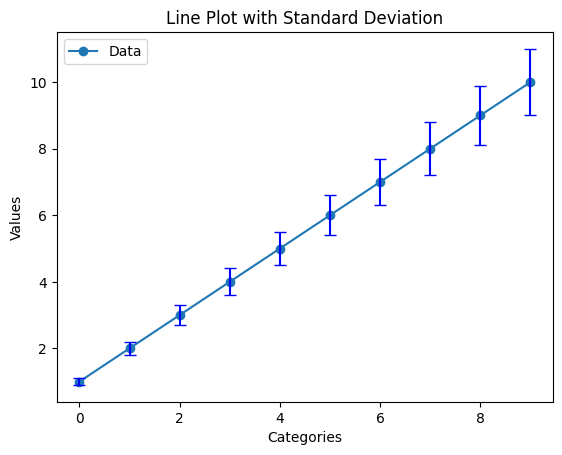

In [29]:
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
stds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the line plot
ax.plot(categories, values, marker='o', linestyle='-', label='Data')

# Add error bars
ax.errorbar(categories, values, yerr=stds, fmt='none', color='b', capsize=4)

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Line Plot with Standard Deviation')

# Add legend
ax.legend()

# Show the plot
plt.show()

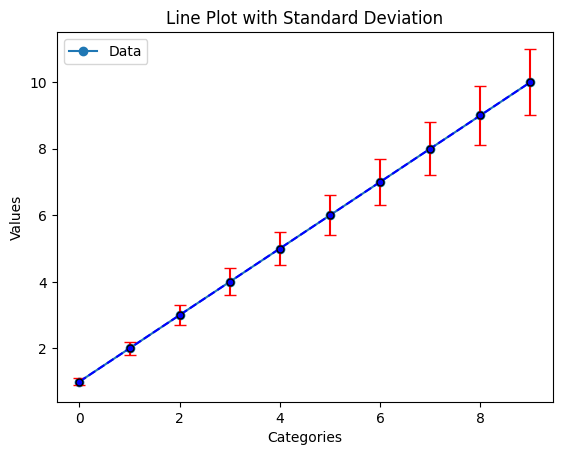

In [30]:
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
stds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the line plot
ax.plot(categories, values, marker='o', linestyle='-', label='Data')

# Add error bars with customizations
ax.errorbar(categories, values, yerr=stds, fmt='o', color='b', markersize=5,
            markeredgecolor='black', ecolor='red', capsize=4, capthick=1, linestyle='--')

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Line Plot with Standard Deviation')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [57]:
df_listing_total["property_type"].value_counts()

property_type
Entire rental unit                    4888
Entire home                           2412
Private room in home                  1507
Private room in rental unit           1440
Entire condo                          1228
Entire guest suite                     881
Entire townhouse                       699
Entire serviced apartment              477
Entire guesthouse                      305
Private room in townhouse              218
Room in boutique hotel                 161
Private room in condo                  153
Private room in bed and breakfast      119
Entire loft                            110
Room in hotel                           64
Private room in guest suite             60
Entire cottage                          56
Entire bungalow                         30
Entire vacation home                    30
Tiny home                               24
Private room in serviced apartment      23
Private room in bungalow                18
Shared room in rental unit              

In [1]:
df_listing_boston.tail()

NameError: name 'df_listing_boston' is not defined

In [20]:
print(df_listing_seattle.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                               object
last_scraped                                    datetime64[ns]
source                                                  object
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                              object
host_location                                           object
host_about                                              object
host_response_time                                     

In [43]:
columns_with_mixed_types = [2, 22, 41, 45, 46, 54]
# Specify the data types for the columns
column_types = {column: str for column in columns_with_mixed_types}
column_types

{2: str, 22: str, 41: str, 45: str, 46: str, 54: str}

In [42]:
df_listing_seattle['id'].value_counts()

id
5.206459e+07    4
5.088915e+07    4
5.093633e+07    4
5.090147e+07    4
5.090008e+07    4
               ..
6.567098e+17    1
7.131755e+17    1
6.566975e+17    1
4.800038e+07    1
8.799124e+17    1
Name: count, Length: 8309, dtype: int64

In [59]:
na_count = df_listing_seattle['id'].isna().sum()
na_count

4

In [58]:
na_count = df_listing_seattle['last_scraped'].isna().sum()
na_count

0

In [36]:
df_listing_seattle['id'].nunique()

8309

In [80]:
df_listing_seattle['last_scraped'].value_counts().sort_index()

last_scraped
2022-09-18    5903
2022-09-22       1
2022-12-24    1012
2023-03-25     598
2023-06-24     416
2023-06-25     379
Name: count, dtype: int64

In [79]:
df_listing_seattle = df_listing_seattle[df_listing_seattle['last_scraped'] != '100%']

In [74]:
df_listing_seattle['id'].value_counts().sort_values(ascending=False)

id
5.206459e+07    4
1.819402e+07    4
1.978602e+07    4
1.977017e+07    4
2.003474e+07    4
               ..
8.799240e+17    1
8.674793e+17    1
8.788266e+17    1
8.825036e+17    1
8.799124e+17    1
Name: count, Length: 8309, dtype: int64

In [76]:
df_listing_seattle[df_listing_seattle['id'] == 20692613]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1319,20692613.0,https://www.airbnb.com/rooms/20692613,20220918143902,2022-09-18,city scrape,Private Guest House in Matthews Beach with Hot...,Private cottage on a quiet street close to Mat...,NaN,https://a0.muscache.com/pictures/ffa8353e-2fef...,72507096,https://www.airbnb.com/users/show/72507096,Tiffani,2016-05-17,"Seattle, WA",:),within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/b93f0...,https://a0.muscache.com/im/pictures/user/b93f0...,Mathews Beach,1,1.0,"['email', 'phone']",t,t,NaN,Matthews Beach,Lake City,47.69477,-122.27844,Entire guesthouse,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Toaster"", ""Stove"", ""Hot tub"", ""Iron"", ""Long ...",$189.00,3,29.0,3.0,3.0,29.0,29.0,3.0,29.0,NaN,t,15.0,30.0,60.0,150,2022-09-18,179.0,40.0,0.0,2017-09-24,2022-07-20,4.94,4.93,4.97,4.99,4.98,4.95,4.84,STR-OPLI-20-001147,t,1.0,1.0,0.0,0.0,2.95
7177,20692613.0,https://www.airbnb.com/rooms/20692613,20221224045325,2022-12-24,city scrape,Private Guest House in Matthews Beach with Hot...,Private cottage on a quiet street close to Mat...,NaN,https://a0.muscache.com/pictures/ffa8353e-2fef...,72507096,https://www.airbnb.com/users/show/72507096,Tiffani,2016-05-17,"Seattle, WA",:),within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/b93f0...,https://a0.muscache.com/im/pictures/user/b93f0...,Mathews Beach,1,1.0,"['email', 'phone']",t,t,NaN,Matthews Beach,Lake City,47.69477,-122.27844,Entire guesthouse,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Hot water"", ""Toaster"", ""Lake access"", ""Refri...",$165.00,2,29.0,2.0,2.0,29.0,29.0,2.0,29.0,NaN,t,23.0,53.0,83.0,172,2022-12-24,187.0,36.0,0.0,2017-09-24,2022-10-24,4.94,4.92,4.97,4.99,4.97,4.95,4.84,STR-OPLI-20-001147,f,1.0,1.0,0.0,0.0,2.92
13260,20692613.0,https://www.airbnb.com/rooms/20692613,20230324234225,2023-03-25,city scrape,Private Guest House in Matthews Beach with Hot...,Private cottage on a quiet street close to Mat...,NaN,https://a0.muscache.com/pictures/ffa8353e-2fef...,72507096,https://www.airbnb.com/users/show/72507096,Tiffani,2016-05-17,"Seattle, WA",:),within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/b93f0...,https://a0.muscache.com/im/pictures/user/b93f0...,Mathews Beach,1,1.0,"['email', 'phone']",t,t,NaN,Matthews Beach,Lake City,47.69477,-122.27844,Entire guesthouse,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Conditioner"", ""Cleaning products"", ""Stove"", ...",$158.00,2,27.0,2.0,2.0,27.0,27.0,2.0,27.0,NaN,t,21.0,51.0,73.0,117,2023-03-25,193.0,31.0,1.0,2017-09-24,2023-03-06,4.94,4.92,4.97,4.99,4.97,4.95,4.84,STR-OPLI-20-001147,f,1.0,1.0,0.0,0.0,2.88
22177,20692613.0,https://www.airbnb.com/rooms/20692613,20230624173239,2023-06-24,city s

In [77]:
df_listing_seattle.drop_duplicates(subset=['id'], inplace=True)

In [81]:
df_listing_seattle['last_scraped'] = pd.to_datetime(df_listing_seattle['last_scraped'])

In [84]:
def listing_start_date(date):
    if (date.month == 9):
        return "before 2022-09"
    elif (date.month == 12):
        return "2022-09 ~ 2022-12"
    elif (date.month == 3):
        return "2022-12 ~ 2023-03"
    else:
        return "2023-03 ~ 2023-06"

In [91]:
df_listing_seattle['period'] = df_listing_seattle['last_scraped'].apply(listing_start_date)
df_listing_seattle['period'].value_counts()

period
before 2022-09       5904
2022-09 ~ 2022-12    1012
2023-03 ~ 2023-06     795
2022-12 ~ 2023-03     598
Name: count, dtype: int64

In [92]:
series = df_listing_seattle['period'].value_counts()
categories = series.index.tolist()
cnts = []
total_cnt = 0
for value in series:
    total_cnt += value
    cnts.append(total_cnt)    

([0, 1, 2, 3],
 [Text(0, 0, 'before 2022-09'),
  Text(1, 0, '2022-09 ~ 2022-12'),
  Text(2, 0, '2023-03 ~ 2023-06'),
  Text(3, 0, '2022-12 ~ 2023-03')])

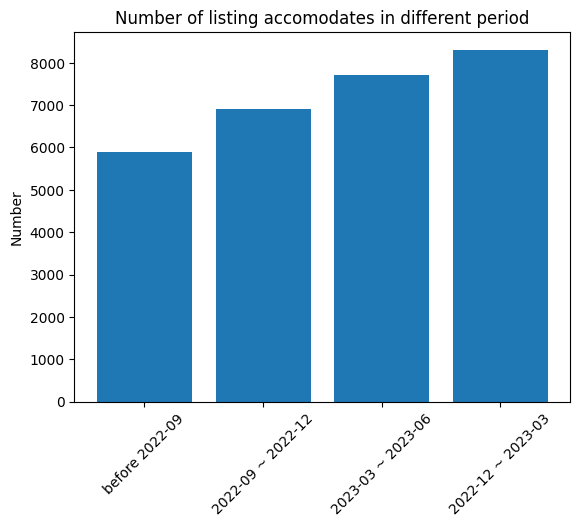

In [99]:
plt.bar(categories, cnts)
plt.xlabel('')
plt.ylabel('Number')
plt.title('Number of listing accomodates in different period')
plt.xticks(rotation=45)  #